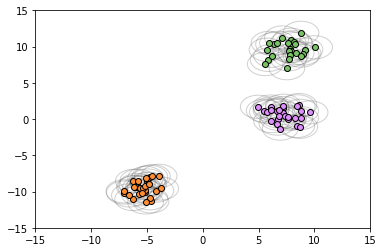

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
eps = 1.6
min_points = 5
#--------------------------------------確認第a個點是core--------------------
stop = False
while stop == False:
    a = random.randint(0,len(dataset_1)-1) #從0到79隨機產生數字
    #print(a)
    m_distt = np.square(m - m[a])
    k = m_distt.sum(axis = 1)
    k = np.sqrt(k) #算每一個點與第a個點的距離
    #print(m_distt)
    #print(k)
    i = 0
    neighbor = []
    while i < len(k):
        if k[i] <= eps and k[i] > 0:  #如果第i個的k小於eps,將i存到neighbor裡
            neighbor.append(i)
        i = i + 1
    #print(neighbor)
    if len(neighbor) >= min_points:
        stop = True
#-------------------------------------------------------------第一次找出的cluster
bord = []
bord.extend(neighbor)
#print(bord)
core = []
core.append(a)
#print(core)
cluster = []
cluster.extend(core + bord)
#print(cluster)
ccluster = cluster[:]#複製原先的cluster，做為迴圈停止的依據
#-----------------------------------------------------
stop = False
while stop == False:
    i = 0
    temp = []
    while i < len(bord):
        m_distt = np.square(m - m[bord[i]])
        k = m_distt.sum(axis = 1) #算每一個點與bord第i個點的距離
        k = np.sqrt(k)
        #print(k)
        j = 0
        neighbor = []
        while j < len(k):
            if k[j] <= eps and k[j] > 0:  #如果第j個的k小於eps,將j存到neighbor裡
                neighbor.append(j)
            j = j + 1
        #print(neighbor)
        temp.extend(neighbor)
        if len(neighbor) >= min_points:
            core.append(bord[i])
        i = i + 1
    #------------------將temp放入bord
    l = 0
    while l < len(temp):
        if temp[l] not in bord:
            bord.append(temp[l])
        l = l + 1
    #-----------------將在bord同時也在core的點移除
    n = len(bord) - 1
    while n >= 0:
        if bord[n] in core:
            bord.remove(bord[n])
        n = n - 1
    #print(core)
    #print(bord)
    cluster = []
    cluster.extend(core + bord)
    #print(cluster)
    if len(cluster) == len(ccluster):
        stop = True
    else:
        ccluster = cluster[:]
#print(core)
#print(bord)
#print(cluster)
#----------------------------------------------將分好的群放入classify,沒分的放unclassify
classify = []
classify.append(cluster)
unclassify = []
i = 0
while i < len(dataset_1):
    if i not in cluster:
        unclassify.append(i)
    i = i + 1
#print(classify)
#print(unclassify)
#---------------------------------------------------------
uunclassify = unclassify[:]
#---------------------------------------------------------
#---------------------------------------------------------分剩下的點至其他群
sstop = False
while sstop == False:
    stop = False
    # --------------------------------------確認第a個點是core--------------------
    while stop == False:
        aa = random.randint(0, len(unclassify) - 1)  # 從0到len(unclassify)-1隨機產生數字
        a = unclassify[aa]
        #print(aa)
        #print(a)
        m_distt = np.square(m - m[a])
        k = m_distt.sum(axis = 1) #算每一個點與第a個點的距離
        k = np.sqrt(k)
        #print(m_distt)
        #print(k)
        i = 0
        neighbor = []
        while i < len(k):
            if k[i] <= eps and k[i] > 0:  #如果第i個的k小於eps,將i存到neighbor裡
                neighbor.append(i)
            i = i + 1
        #print(neighbor)
        if len(neighbor) >= min_points:
            stop = True
    #-------------------------------------------------------------第一次找出的cluster
    bord = []
    bord.extend(neighbor)
    #print(bord)
    core = []
    core.append(a)
    #print(core)
    cluster = []
    cluster.extend(core + bord)
    #print(cluster)
    ccluster = cluster[:]#複製原先的cluster，做為迴圈停止的依據
    #-----------------------------------------------------
    stop = False
    while stop == False:
        i = 0
        temp = []
        while i < len(bord):
            m_distt = np.square(m - m[bord[i]])
            k = m_distt.sum(axis = 1) #算每一個點與bord第i個點的距離
            k = np.sqrt(k)
            #print(k)
            j = 0
            neighbor = []
            while j < len(k):
                if k[j] <= eps and k[j] > 0:  #如果第j個的k小於eps,將j存到neighbor裡
                    neighbor.append(j)
                j = j + 1
            #print(neighbor)
            temp.extend(neighbor)
            if len(neighbor) >= min_points:
                core.append(bord[i])
            i = i + 1
        #------------------將temp放入bord
        l = 0
        while l < len(temp):
            if temp[l] not in bord:
                bord.append(temp[l])
            l = l + 1
        #-----------------將在bord同時也在core的點移除
        n = len(bord) - 1
        while n >= 0:
            if bord[n] in core:
                bord.remove(bord[n])
            n = n - 1
        #print(core)
        #print(bord)
        cluster = []
        cluster.extend(core + bord)
        #print(cluster)
        if len(cluster) == len(ccluster):
            stop = True
        else:
            ccluster = cluster[:]
    #print(core)
    #print(bord)
    #print(cluster)
    i = len(unclassify) - 1
    while i >= 0:
        if unclassify[i] in cluster:
            unclassify.remove(unclassify[i])
        i = i - 1
    classify.append(cluster)
    #print(classify)
    #print(unclassify)
    if len(unclassify) == len(uunclassify) or len(unclassify) == 0:
        sstop = True
    else:
        uunclassify = unclassify[:]

#print(classify)
#print(unclassify)
#--------------------------------------------------------------------------畫圖

colors = ['#df8efd', '#78c465', '#ff8e34','#f65e97', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
fig, ax = plt.subplots()
i = 0
while i < len(classify):
    j = 0
    while j < len(classify[i]):
        plt.scatter(dataset_1[classify[i][j]][0], dataset_1[classify[i][j]][1]
                    ,color=colors[i],edgecolor='black')
        circle1 = plt.Circle((dataset_1[classify[i][j]][0], dataset_1[classify[i][j]][1])
                             , eps, color='#666666', fill=False, zorder=0
                             , alpha=0.3)
        ax.add_artist(circle1)
        j = j + 1
    i = i + 1
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

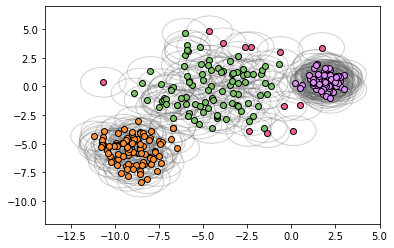

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

dataset_1 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_1)
eps = 1.3
min_points = 5
#--------------------------------------確認第a個點是core--------------------
stop = False
while stop == False:
    a = random.randint(0,len(dataset_1)-1) #從0到299隨機產生數字
    #print(a)
    m_distt = np.square(m - m[a])
    k = m_distt.sum(axis=1)
    k = np.sqrt(k)  # 算每一個點與第a個點的距離
    #print(m_distt)
    #print(k)
    i = 0
    neighbor = []
    while i < len(k):
        if k[i] <= eps and k[i] > 0:  #如果第i個的k小於eps,將i存到neighbor裡
            neighbor.append(i)
        i = i + 1
    #print(neighbor)
    if len(neighbor) >= min_points:
        stop = True
#-------------------------------------------------------------第一次找出的cluster
bord = []
bord.extend(neighbor)
#print(bord)
core = []
core.append(a)
#print(core)
cluster = []
cluster.extend(core + bord)
#print(cluster)
ccluster = cluster[:]#複製原先的cluster，做為迴圈停止的依據
#-----------------------------------------------------
stop = False
while stop == False:
    i = 0
    temp = []
    while i < len(bord):
        m_distt = np.square(m - m[bord[i]])
        k = m_distt.sum(axis=1)
        k = np.sqrt(k)  # 算每一個點與第a個點的距離
        #print(k)
        j = 0
        neighbor = []
        while j < len(k):
            if k[j] <= eps and k[j] > 0:  #如果第j個的k小於eps,將j存到neighbor裡
                neighbor.append(j)
            j = j + 1
        #print(neighbor)
        if len(neighbor) >= min_points: #如果bord[i]的neighbor數量大於等於min_points
            core.append(bord[i])        #將bord[i]存到core
            temp.extend(neighbor)       #將neighbor存到temp
        i = i + 1
    #------------------將temp放入bord
    #print(temp)
    l = 0
    while l < len(temp):
        if temp[l] not in bord:
            bord.append(temp[l])
        l = l + 1
    #-----------------將在bord同時也在core的點移除
    n = len(bord) - 1
    while n >= 0:
        if bord[n] in core:
            bord.remove(bord[n])
        n = n - 1
    #print(core)
    #print(bord)
    cluster = []
    cluster.extend(core + bord)
    #print(cluster)
    if len(cluster) == len(ccluster):
        stop = True
    else:
        ccluster = cluster[:]
#print(core)
#print(bord)
#print(cluster)
#----------------------------------------------將分好的群放入classify,沒分的放unclassify
classify = []
classify.append(cluster)
unclassify = []
i = 0
while i < len(dataset_1):
    if i not in cluster:
        unclassify.append(i)
    i = i + 1
#print(classify)
#print(unclassify)
#---------------------------------------------------------
uunclassify = unclassify[:]
#---------------------------------------------------------
#---------------------------------------------------------分剩下的點至其他群
sstop = False
while sstop == False:
    stop = False
    # --------------------------------------確認第a個點是core--------------------
    while stop == False:
        aa = random.randint(0, len(unclassify) - 1)  # 從0到len(unclassify)-1隨機產生數字
        a = unclassify[aa]
        #print(aa)
        #print(a)
        m_distt = np.square(m - m[a])
        k = m_distt.sum(axis=1)
        k = np.sqrt(k)  # 算每一個點與第a個點的距離
        #print(m_distt)
        #print(k)
        i = 0
        neighbor = []
        while i < len(k):
            if k[i] <= eps and k[i] > 0:  #如果第i個的k小於eps,將i存到neighbor裡
                neighbor.append(i)
            i = i + 1
        #print(neighbor)
        if len(neighbor) >= min_points:
            stop = True
    #-------------------------------------------------------------第一次找出的cluster
    bord = []
    bord.extend(neighbor)
    #print(bord)
    core = []
    core.append(a)
    #print(core)
    cluster = []
    cluster.extend(core + bord)
    #print(cluster)
    ccluster = cluster[:]#複製原先的cluster，做為迴圈停止的依據
    #-----------------------------------------------------
    stop = False
    while stop == False:
        i = 0
        temp = []
        while i < len(bord):
            m_distt = np.square(m - m[bord[i]])
            k = m_distt.sum(axis=1)
            k = np.sqrt(k)  # 算每一個點與第a個點的距離
            #print(k)
            j = 0
            neighbor = []
            while j < len(k):
                if k[j] <= eps and k[j] > 0:  #如果第j個的k小於eps,將j存到neighbor裡
                    neighbor.append(j)
                j = j + 1
            #print(neighbor)
            if len(neighbor) >= min_points:  #如果bord[i]的neighbor數量大於等於min_points
                core.append(bord[i])         #將bord[i]存到core
                temp.extend(neighbor)        #將neighbor存到temp
            i = i + 1
        #------------------將temp放入bord
        l = 0
        while l < len(temp):
            if temp[l] not in bord:
                bord.append(temp[l])
            l = l + 1
        #-----------------將在bord同時也在core的點移除
        n = len(bord) - 1
        while n >= 0:
            if bord[n] in core:
                bord.remove(bord[n])
            n = n - 1
        #print(core)
        #print(bord)
        cluster = []
        cluster.extend(core + bord)
        #print(cluster)
        if len(cluster) == len(ccluster):
            stop = True
        else:
            ccluster = cluster[:]
    #print(core)
    #print(bord)
    #print(cluster)
    i = len(unclassify) - 1
    while i >= 0:
        if unclassify[i] in cluster:
            unclassify.remove(unclassify[i])
        i = i - 1
    classify.append(cluster)
    #print(classify)
    #print(unclassify)
    if len(unclassify) == len(uunclassify) or len(unclassify) < 15:
        sstop = True
    else:
        uunclassify = unclassify[:]
#print(classify)
#print(unclassify) #跑出來noise多了四個...........
#--------------------------------------------------------------------------畫圖
colors = ['#df8efd', '#78c465', '#ff8e34','#f65e97', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
fig, ax = plt.subplots()
i = 0
while i < len(classify):
    j = 0
    while j < len(classify[i]):
        plt.scatter(dataset_1[classify[i][j]][0], dataset_1[classify[i][j]][1]
                    ,color=colors[i],edgecolor='black')
        circle1 = plt.Circle((dataset_1[classify[i][j]][0], dataset_1[classify[i][j]][1])
                             , eps, color='#666666', fill=False, zorder=0
                             , alpha=0.3)
        ax.add_artist(circle1)
        j = j + 1
    i = i + 1
j = 0
while j < len(unclassify):
    plt.scatter(dataset_1[unclassify[j]][0], dataset_1[unclassify[j]][1]
                , color=colors[i], edgecolor='black')
    circle1 = plt.Circle((dataset_1[unclassify[j]][0], dataset_1[unclassify[j]][1])
                         , eps, color='#666666', fill=False, zorder=0
                         , alpha=0.3)
    ax.add_artist(circle1)
    j = j + 1
plt.xlim(-14,5)
plt.ylim(-12,7)
plt.show()


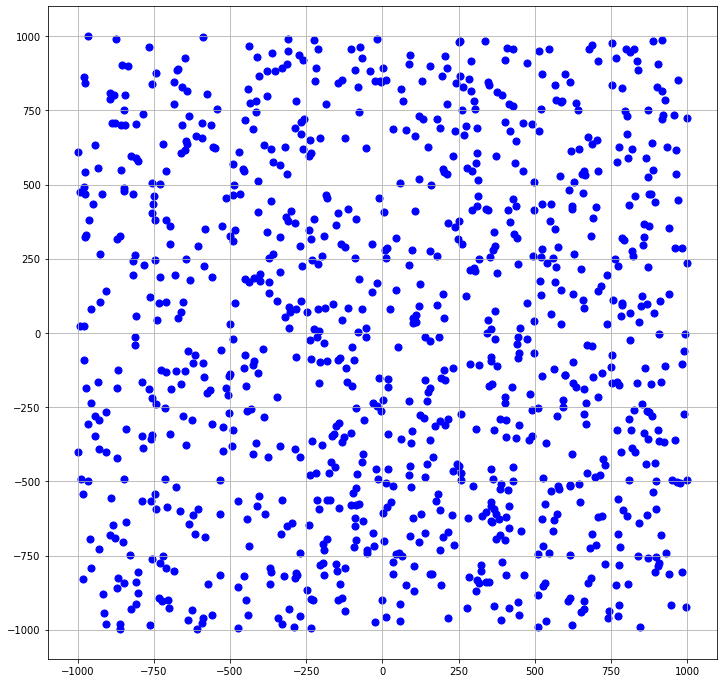

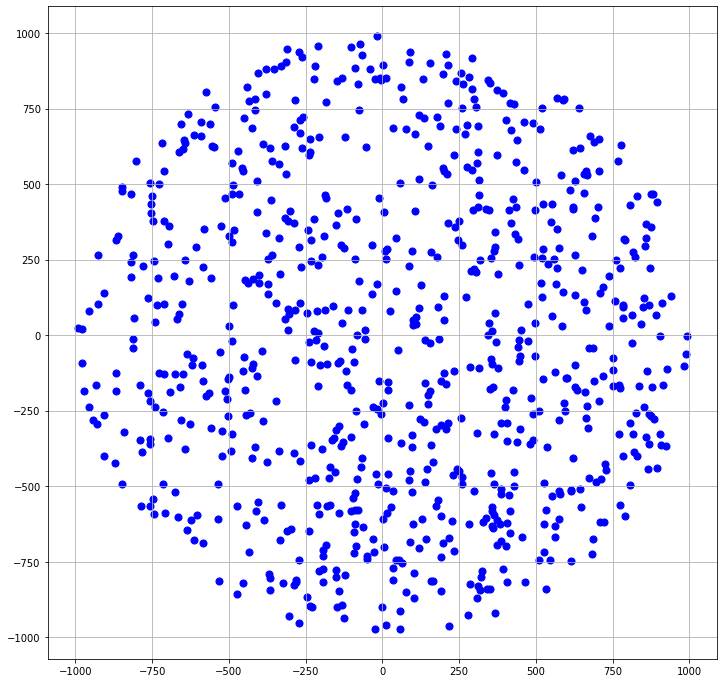

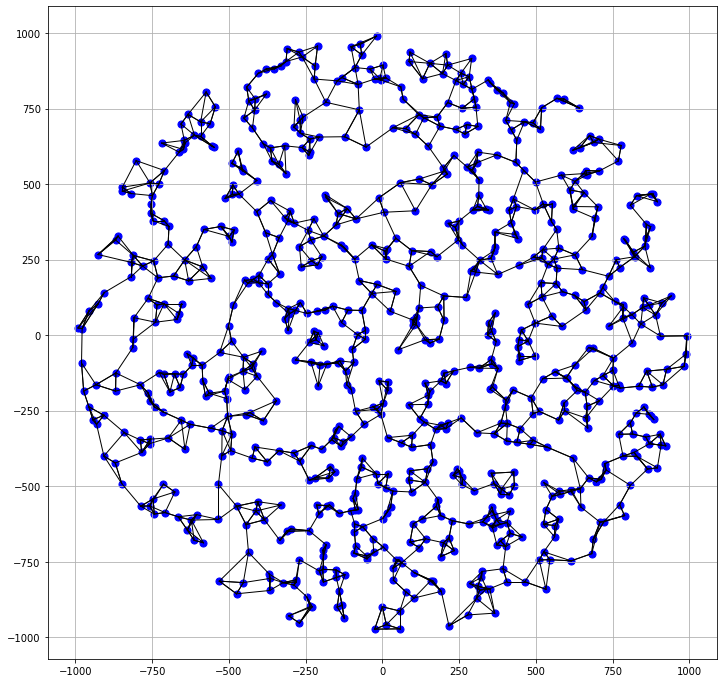

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(777)
a = list(random.randint(-1000, 1000) for _ in range(1000))
b = list(random.randint(-1000, 1000) for _ in range(1000))
scat_X = np.array(a)
scat_Y = np.array(b)
#------------------------------------------------------------------
plt.figure(figsize = (12, 12))
plt.scatter(scat_X,scat_Y,color='blue',s=50)
plt.grid()
plt.show()
plt.close('all')
#-------------------------------------------------------------------
m = np.vstack([scat_X,scat_Y])
m = m.transpose()
#print(m)
m_distt = np.square(m)
kk = m_distt.sum(axis=1)
kk = np.sqrt(kk)  # 算每一個點與原點的距離
plt.figure(figsize = (12, 12))
i = 0
p_i_c = []
while i < len(kk):
    if kk[i] <= 1000:  # 如果第i個的k小於1000，將對應的點點到散佈圖上
        plt.scatter(m[i][0],m[i][1],s=50,color='blue')
        p_i_c.append(i)
    i = i + 1
plt.grid()
plt.show()
plt.close('all')
#------------------------------------------------------------------------------------------------------
m_distt = np.square(m - m[p_i_c[0]])
k = m_distt.sum(axis=1)  # 算圓內第一個點與其他點的距離平方
dist_sq = np.vstack([k])
#print(dist_sq)
i = 1
while i < len(p_i_c):
    m_distt = np.square(m - m[p_i_c[i]])
    k = m_distt.sum(axis=1)  # 算圓內每一個點與原點的距離平方
    dist_sq = np.vstack([dist_sq,k])
    i = i + 1
near = np.argsort(dist_sq[0],axis=0)
i = 1
while i < len(dist_sq):
    nnear = np.argsort(dist_sq[i],axis=0) # 對點與點的距離排序獲得index
    near = np.vstack([near,nnear])
    i = i + 1
#print(near)
#----------------------------------------------------------------
index = []
i = 0
while i < len(near):
    indexx = []
    j = 0
    stop = False
    while stop == False:
        if near[i][j] in p_i_c:         #只取在圓內的點
            indexx.append(near[i][j])
        if len(indexx) == 4:      #除了自己以外，取最近的三個點
            stop = True
        j = j + 1
    index.append(indexx)
    i = i + 1
#print(index)
#--------------------------------------------------------------------------------
plt.figure(figsize = (12, 12))
i = 0
while i < len(kk):
    if kk[i] <= 1000:  # 如果第i個的k小於1000，將對應的點點到散佈圖上
        plt.scatter(m[i][0],m[i][1],s=50,color='blue')
    i = i + 1
plt.grid()
i = 0
while i < len(index):
    j = 1
    while j < len(index[i]):
        plt.plot((m[index[i][0]][0],m[index[i][j]][0]),(m[index[i][0]][1],m[index[i][j]][1]),lw=1 ,color='black')
        j = j + 1
    i = i + 1
plt.show()